In [1]:
import pandas as pan
data = pan.read_csv('Rainfall_data.csv')
data


,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [2]:
from sklearn.model_selection import train_test_split
Input = data.drop(columns = ['Index','Rain'])
output = data['Rain']
Train_X,test_X,Train_y,test_y = train_test_split(Input,output,test_size=0.1)

In [3]:
# For making desicions import a library
from sklearn.tree import DecisionTreeClassifier
Classification_Model = DecisionTreeClassifier()
Classification_Model.fit(Train_X,Train_y)

DecisionTreeClassifier()

In [4]:
# Classification_Model.predict([[33,70],[20,0]])

In [5]:
Hypothesis = Classification_Model.predict(test_X)
test_y

8995     Yes
4961      No
2198     Yes
8577     Yes
15547     No
        ... 
9089      No
2919     Yes
5356     Yes
10947    Yes
17921    Yes
Name: Rain, Length: 2000, dtype: object

In [6]:
compare = pan.DataFrame({"Data_Y":test_y.values,'Prediction':Hypothesis})

In [7]:
compare

,Data_Y,Prediction
0,Yes,Yes
1,No,Yes
2,Yes,Yes
3,Yes,Yes
4,No,No
...,...,...
1995,No,No
1996,Yes,Yes
1997,Yes,Yes
1998,Yes,Yes


In [8]:
# To draw the graph Let's convert Yes and No to 1 and 0
from sklearn.preprocessing import LabelEncoder
RainEncoder = LabelEncoder()
RainEncoder.fit(['Yes','No'])

LabelEncoder()

In [9]:
compare['Data_Y'] = RainEncoder.transform(compare['Data_Y'])
compare['Prediction'] = RainEncoder.transform(compare['Prediction'])

<AxesSubplot:ylabel='Density'>

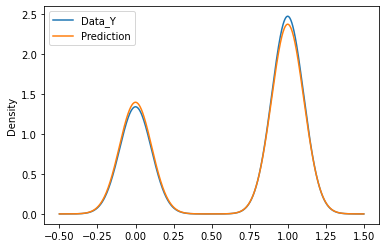

In [10]:
compare.plot(kind='density')

In [11]:
from sklearn.metrics import accuracy_score
Percentage_accuracy = accuracy_score(test_y,Hypothesis)*100
print('Accuracy = ',Percentage_accuracy,'%')

Accuracy =  88.9 %
